In [1]:
import warnings
from scipy import stats
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#to avoid warnings from seaborn library
warnings.filterwarnings('ignore','is_categorical_dtype')
warnings.filterwarnings('ignore','use_inf_as_na')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving All_cars_data_clean.csv to All_cars_data_clean (3).csv


In [3]:
df = pd.read_csv("All_cars_data_clean.csv")

In [4]:
df.shape

(9711, 10)

In [5]:
df.dtypes

car_name            object
car_status          object
car_price            int64
dealer_name         object
dealer_Rate        float64
dealer_reviews       int64
dealer_location     object
tel_number          object
state               object
region              object
dtype: object

In [6]:
SEED = 1234

In [7]:
df.sample(n=5, random_state=SEED)

,car_name,car_status,car_price,dealer_name,dealer_Rate,dealer_reviews,dealer_location,tel_number,state,region
1093,2010 MINI Cooper S Base,Used,7500,Universal Chrysler Dodge Jeep Ram,0.0,6,"Odessa, MO",tel:+1-866-728-6861,Odessa,MO
8721,2024 Hyundai Palisade Limited,New,51820,Fuccillo Hyundai of Watertown,0.0,0,"Watertown, NY",tel:+1-315-836-4246,Watertown,NY
2659,2007 Honda Element EX,Used,6100,NaN,0.0,0,NaN,NaN,no_state,no_region
8483,2022 Chevrolet Silverado 1500 Limited Custom,Used,34999,"H&K Chevrolet, Inc.",0.0,8,"Continental, OH",tel:+1-888-392-7836,Continental,OH
7459,2020 Toyota Camry XSE,Used,25995,Dana Motors,0.0,3,"Billings, MT",tel:+1-406-409-4770,Billings,MT


In [8]:
car_name = df['car_name'].unique().tolist()
len(car_name)

5430

There are 5430 unique car model in the data set.

In [9]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
car_price,9711.0,42329.733910,56765.162103,1995.0,19995.0,31995.0,50761.0,3400000.0
dealer_Rate,9711.0,2.994583,2.083632,0.0,0.0,4.2,4.7,5.0
dealer_reviews,9711.0,627.622387,1155.576905,0.0,17.0,187.0,760.0,15891.0


In [10]:
df.describe(include='O').T

,count,unique,top,freq
car_name,9711,5430,2024 Jeep Grand Cherokee 4xe Base,78
car_status,9711,2,Used,6316
dealer_name,9505,4380,Bolton Ford,57
dealer_location,9493,2158,"Lake Charles, LA",71
tel_number,9502,4845,tel:+1-337-214-1980,56
state,9711,1872,no_state,218
region,9711,51,CA,800


In [11]:
round(df.isna().mean() * 100, 2)

car_name           0.00
car_status         0.00
car_price          0.00
dealer_name        2.12
dealer_Rate        0.00
dealer_reviews     0.00
dealer_location    2.24
tel_number         2.15
state              0.00
region             0.00
dtype: float64

The missing data doesnt represente more then 2.5% in any variable. We can drop it.

In [12]:
df.dropna(axis=0).isna().sum()

car_name           0
car_status         0
car_price          0
dealer_name        0
dealer_Rate        0
dealer_reviews     0
dealer_location    0
tel_number         0
state              0
region             0
dtype: int64

In [13]:
df.dropna(axis=0, inplace=True)

In [14]:
df.isna().sum()

car_name           0
car_status         0
car_price          0
dealer_name        0
dealer_Rate        0
dealer_reviews     0
dealer_location    0
tel_number         0
state              0
region             0
dtype: int64

In [15]:
df.duplicated().sum()

700

There are 700 duplicated rows. It can be ok, because one dealer can have a lot of the same cars, but we wnat to predict the price of 1 model. So we can drop the duplicated data.

In [16]:
df.shape

(9490, 10)

In [17]:
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

0

In [18]:
len(df)

8790

In [19]:
df[['car_year', 'car_model']] = df['car_name'].str.split(n=1, expand=True)

In [20]:
print(df[['car_year', 'car_model']].head())

  car_year                                  car_model
0     2024                            GMC Terrain SLE
1     2024                      Cadillac LYRIQ Luxury
2     2024  Mercedes-Benz Sprinter 2500 Standard Roof
3     2024                           Mazda CX-30 Base
4     2024                       Alfa Romeo Giulia Ti


In [21]:
df.drop(columns=['car_name'], inplace=True)

df.insert(0, 'car_model', df.pop('car_model'))
df.insert(0, 'car_year', df.pop('car_year'))

Splitted the car_name column in two diferents, car_year and car_model. Now our data frame contains 11 colums.

In [22]:
df

,car_year,car_model,car_status,car_price,dealer_name,dealer_Rate,dealer_reviews,dealer_location,tel_number,state,region
0,2024,GMC Terrain SLE,New,30309,Hulett Chevy Buick GMC,4.9,44,"Camdenton, MO",tel:+1-573-693-4677,Camdenton,MO
1,2024,Cadillac LYRIQ Luxury,New,72815,Parker Cadillac,4.2,286,"Little Rock, AR",tel:+1-501-392-3027,Little Rock,AR
2,2024,Mercedes-Benz Sprinter 2500 Standard Roof,New,60173,Mercedes-Benz of McKinney,4.9,674,"McKinney, TX",tel:+1-888-650-0079,McKinney,TX
3,2024,Mazda CX-30 Base,New,26820,Mccurley Mazda,4.9,746,"Pasco, WA",tel:+1-509-412-3193,Pasco,WA
4,2024,Alfa Romeo Giulia Ti,New,50370,Greenway FIAT of East Orlando,3.5,149,"Orlando, FL",tel:+1-407-287-5104,Orlando,FL
...,...,...,...,...,...,...,...,...,...,...,...
9706,2023,Chrysler 300 Touring L,New,44390,Landers Chrysler Dodge Jeep RAM,4.3,3817,"Little Rock, AR",tel:+1-888-712-5134,Little Rock,AR
9707,2021,Ford Edge Titanium,Used,23995,Lithia Toyota of Redding,4.6,1614,"Redding, CA",tel:+1-530-722-6853,Redding,CA
9708,2016,Hyundai Sonata Hybrid SE,Used,12995,McMinn Motors Inc.,0.0,54,"Athens, TN",tel:+1-423-381-6417,Athens,TN
9709,2019,Buick Encore Preferred,Used,17988,Meyer Motors,4.6,44,"Plymouth, WI",tel:+1-920-876-6749,Plymouth,WI


In [23]:
df.shape

(8790, 11)

In [24]:
df_num = df.select_dtypes(include=np.number)

In [25]:
df_num_norm = (df_num - df_num.mean()) / df_num.std()

Using standardization o z-score normalization to normalize numeric data. Because in dealer_rate, we have 0 in some rowa, and the result can be wrong if we use another estrategy.

In [26]:
df_num_norm

,car_price,dealer_Rate,dealer_reviews
0,-0.205441,0.904558,-0.498913
1,0.530448,0.566776,-0.291362
2,0.311582,0.904558,0.041407
3,-0.265845,0.904558,0.103158
4,0.141867,0.228993,-0.408860
...,...,...,...
9706,0.038337,0.615030,2.737004
9707,-0.314753,0.759794,0.847599
9708,-0.505191,-1.459921,-0.490337
9709,-0.418750,0.759794,-0.498913


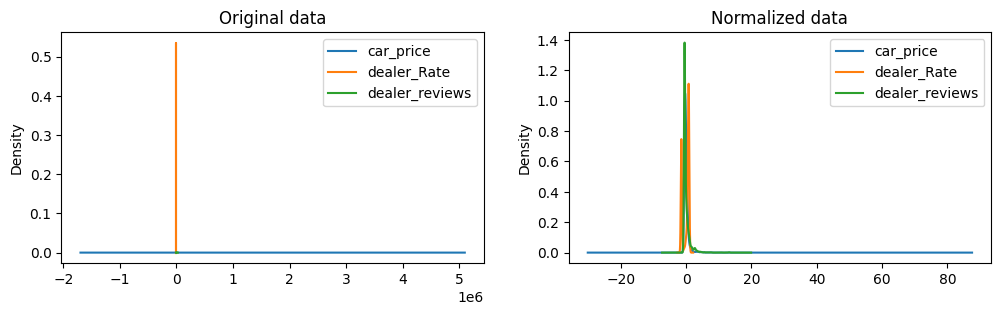

In [27]:
fig, ax = plt.subplots(1,2)
df_num.plot.density(figsize=(12, 3), grid = False, ax=ax[0])
df_num_norm.plot.density(figsize=(12, 3), grid = False, ax=ax[1])

ax[0].title.set_text('Original data')
ax[1].title.set_text('Normalized data')

plt.show()

In [28]:
df.shape

(8790, 11)

In [29]:
df = df.select_dtypes(include='O').join(df_num_norm, how='left')

In [30]:
df.shape

(8790, 11)

In [31]:
df.isna().sum()

car_year           0
car_model          0
car_status         0
dealer_name        0
dealer_location    0
tel_number         0
state              0
region             0
car_price          0
dealer_Rate        0
dealer_reviews     0
dtype: int64

OJO, preguntar: No supe como hacer la codificación, ya que el label encoding y el binary encoding introducen mucho sesgo , y el one-hot me resultaría en un dataset muy grande. ya que son muchos modelos de coches.